> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDB Project

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Visualization">Visualization</a></li>

</ul>

<a id='intro'></a>
## Introduction

>At this project, We are going to go through 3 phases of data analysis:
> 1-Wrangling Data
>  2-Cleaning Data
>  3-Visualizing Data

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> Her we are going to gathering the data using pandas libreary specially(using read_csv function )  

### General Properties

In [12]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [27]:
# two fuctions one for the mean and another for maximum 
def the_mean(year, column):
     m = df[df.release_year == year][column].mean()
     return m
def the_max(year, column):
     x = df[df.release_year == year][column].max()
     return x

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

In [14]:
#first here we drop any null values at data set
#second we calculated the mean of budget and revenue then we replaced any zero values at the budget and revenue with
#the mean of them like you asked at first review and we show the first 20 rowes of data
df.dropna(inplace=True)
m1=df['budget'].mean()
m2=df['revenue'].mean()                       
df[df.budget==0]=m1
df[df.revenue==0]=m2
df.head(20)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397.0,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562.0,6.5,2015.0,1.379999e+08,1.392446e+09
1,76341.0,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185.0,7.1,2015.0,1.379999e+08,3.481613e+08
2,262500.0,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480.0,6.3,2015.0,1.012000e+08,2.716190e+08
3,140607.0,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292.0,7.5,2015.0,1.839999e+08,1.902723e+09
4,168259.0,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947.0,7.3,2015.0,1.747999e+08,1.385749e+09
5,281957.0,tt1663202,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156.0,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/2015,3929.0,7.2,2015.0,1.241999e+08,4.903142e+08
6,87101.0,tt1340138,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125.0,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/2015,2598.0,5.8,2015.0,1.425999e+08,4.053551e+08
7,286217.0,tt3659388,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141.0,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/2015,4572.0,7.6,2015.0,9.935996e+07,5.477497e+08
8,211672.0,tt2293640,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91.0,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/2015,2893.0,6.5,2015.0,6.807997e+07,1.064192e+09
9,150540.0,tt2096673,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,.

<a id='eda'></a>
## Exploratory Data Analysis

> At this part we are going to answer questions about our data
### Which genres are most popular from year to year?

In [29]:
#Here we will use the popularity and we will group it by the release year
#and we will show the genres for the maximumpopularity at each year
df.groupby('release_year')['revenue'].mean()

release_year
1.961000e+03    4.000000e+06
1.962000e+03    5.960000e+07
1.963000e+03    7.889876e+07
1.964000e+03    6.295027e+07
1.965000e+03    1.411957e+08
1.967000e+03    1.115848e+08
1.969000e+03    8.197449e+07
1.971000e+03    4.588650e+07
1.972000e+03    2.450664e+08
1.973000e+03    3.015420e+08
1.974000e+03    9.757200e+07
1.975000e+03    1.961918e+08
1.977000e+03    4.804183e+08
1.978000e+03    1.055000e+08
1.979000e+03    1.026729e+08
1.980000e+03    2.798892e+08
1.981000e+03    1.219442e+08
1.982000e+03    2.798207e+08
1.983000e+03    1.996924e+08
1.984000e+03    1.838320e+08
1.985000e+03    2.667689e+08
1.986000e+03    1.100000e+07
1.987000e+03    1.143605e+08
1.988000e+03    1.014589e+07
1.989000e+03    2.507060e+08
1.990000e+03    2.144946e+08
1.991000e+03    1.923926e+08
1.992000e+03    2.354249e+08
1.993000e+03    2.139293e+08
1.994000e+03    2.120887e+08
1.995000e+03    1.520977e+08
1.996000e+03    1.300907e+08
1.997000e+03    4.125569e+08
1.998000e+03    1.222390e+08
1

### What kinds of properties are associated with movies that have high revenues?


In [16]:
# Here we need to view any revenue is bigger than the average
z=df['revenue'].mean()
df_high_avg=df.query("revenue>{0}".format(z))
df_high_avg.groupby('keywords').revenue.max()

keywords
1970s|mutant|time travel|marvel comic|based on comic book                                    7.460000e+08
adolescence|based on novel|loss of child|fight|chase                                         2.222312e+08
adoptive father|orphanage|life's dream|rival|stealing                                        5.435140e+08
adultery|coming out|loss of father|first time|camcorder                                      3.562966e+08
africa|brain tumor|wife husband relationship|casual meeting|pyramid                          1.753725e+08
africa|jealousy|dance|hunger|lion                                                            6.039004e+08
alcohol|one-night stand|bed|pregnancy and birth|condom                                       2.190765e+08
alcohol|waitress|cemetery|casual meeting|restaurant                                          1.477804e+08
alien|giant robot|duringcreditsstinger                                                       3.815099e+08
ambush|sadness|stage|liberation of pr

<a id='Visualization'></a>
## Visualization

Text(0.5, 1.0, 'The distrubtion revenue at the last five years')

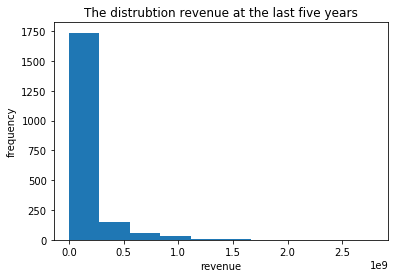

In [17]:
#this a histogram that shown the distribution of the revenue
plt.hist(df['revenue'])
plt.xlabel("revenue")
plt.ylabel("frequency")
plt.title("The distrubtion revenue at the last five years")

In [32]:
#We calculated the mean of budget at some years the function defined it
#This visualization is a correlation between the means at 2000,2006,2008,2012,2014 and 2015 then you can compare them easily and know 
#which year have a high budget
m_2000=the_mean(2000, 'budget')
m_2006=the_mean(2006, 'budget')
m_2008=the_mean(2008, 'budget')
m_2012=the_mean(2012, 'budget')
m_2014=the_mean(2014, 'budget')
m_2015=the_mean(2015, 'budget')

Text(0.5, 1.0, 'The mean budget at the last five years')

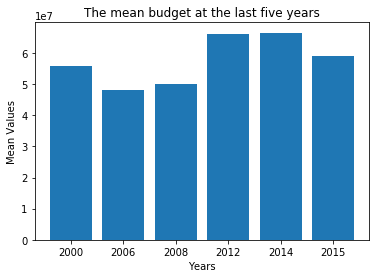

In [33]:
plt.bar(["2000","2006","2008","2012","2014","2015"],[m_2000,m_2006,m_2008,m_2012,m_2014,m_2015])
plt.xlabel("Years")
plt.ylabel("Mean Values")
plt.title("The mean budget at the last five years")

Text(0.5, 1.0, 'The distrubtion of popularity ')

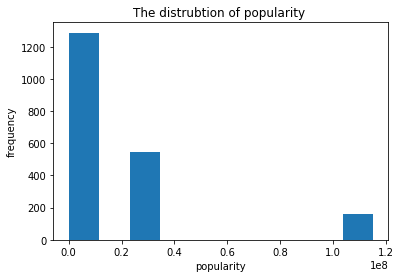

In [34]:
plt.hist(df['popularity'])
plt.xlabel("popularity")
plt.ylabel("frequency")
plt.title("The distrubtion of popularity ")

Text(0.5, 1.0, 'The max popularity at the last five years')

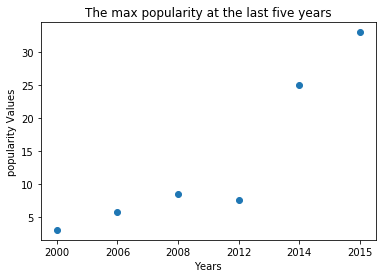

In [35]:
p_2000=the_max(2000,'popularity')
p_2006=the_max(2006,'popularity')
p_2008=the_max(2008,'popularity')
p_2012=the_max(2012,'popularity')
p_2014=the_max(2014,'popularity')
p_2015=the_max(2015,'popularity')

plt.scatter(["2000","2006","2008","2012","2014","2015"],[p_2000,p_2006,p_2008,p_2012,p_2014,p_2015])
plt.xlabel("Years")
plt.ylabel("popularity Values")
plt.title("The max popularity at the last five years")

<a id='conclusions'></a>
## Conclusions
>This is a data set talked about films and all information about the film and I had 2 questions to answer about it 
>We answered the first one and we have our output The release year and the genre of the film beside it 
>and we answered the seconde by considered that the key words is the properties of the film and any film have revenue bigger than the average revenue is high revenue.

limitations:-
>When I begin to clean data I found that there is many zeros at revenue and budget.
> and I replaced this zeros with the mean of each column
